# lab02: Histograms

In [2]:
import sys
print(sys.executable)

/usr/local/bin/python3.10


In [3]:
import cv2
from matplotlib import pyplot as plt

## 1. Creating Histograms

![Source Image](./Tulip.jpeg)

### Histograms of BGR

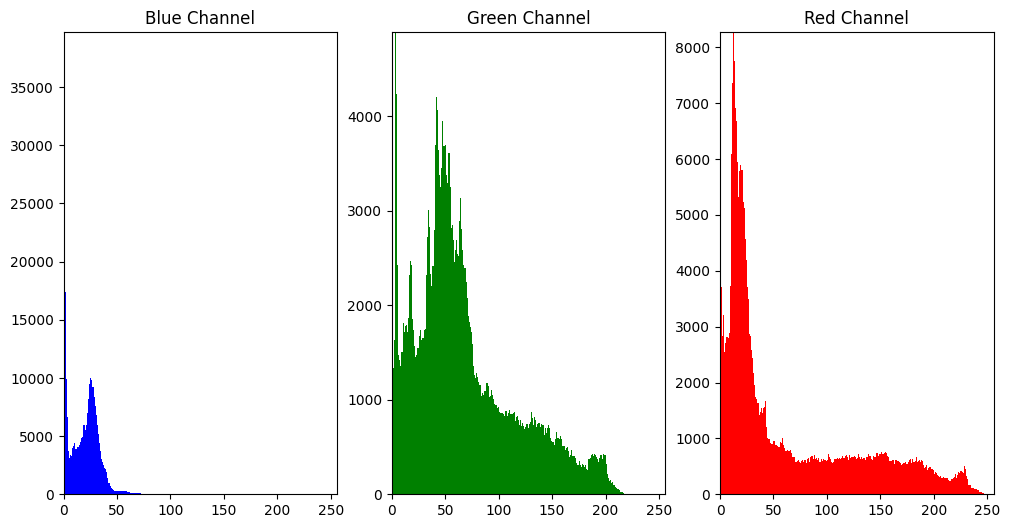

In [4]:
# opencv 默认通过 BGR 格式读取图片
img = cv2.imread('./Tulip.jpeg')
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.hist(blue.ravel(), 256, [0, 256], color="blue") 
ax2.hist(green.ravel(), 256, [0, 256], color="green")  
ax3.hist(red.ravel(), 256, [0, 256], color="red")
ax1.set_title('Blue Channel')
ax2.set_title('Green Channel')
ax3.set_title('Red Channel')
ax1.margins(0)
ax2.margins(0)
ax3.margins(0)
plt.show()

### Histogram of HSV

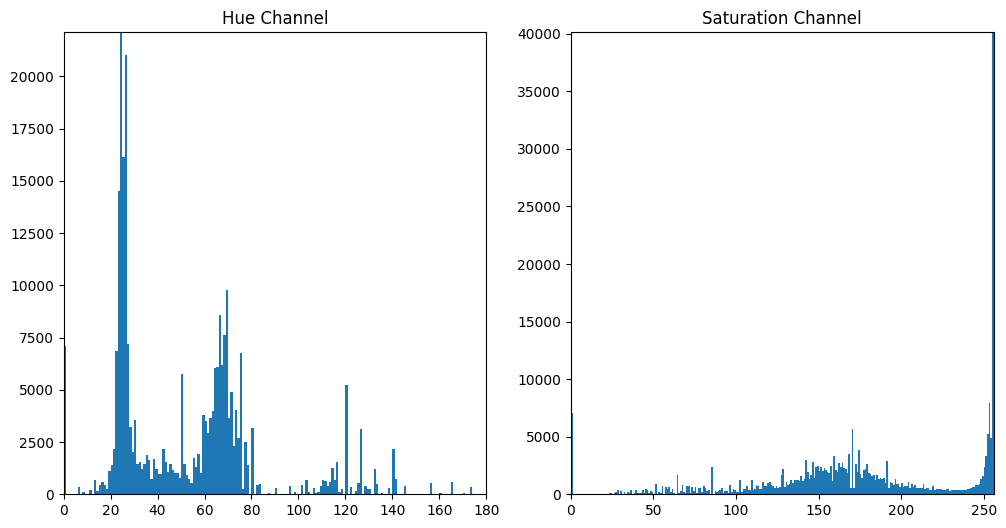

In [5]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue = img_hsv[:, :, 0]
sat = img_hsv[:, :, 1]

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(hue.ravel(), 180, [0, 180])
ax2.hist(sat.ravel(), 256, [0, 256])
ax1.set_title('Hue Channel')
ax2.set_title('Saturation Channel')
ax1.margins(0)
ax2.margins(0)
plt.show()

### Histogram of GreyScale

`bin = 360` 意味着直方图将被划分为360个等宽的柱子

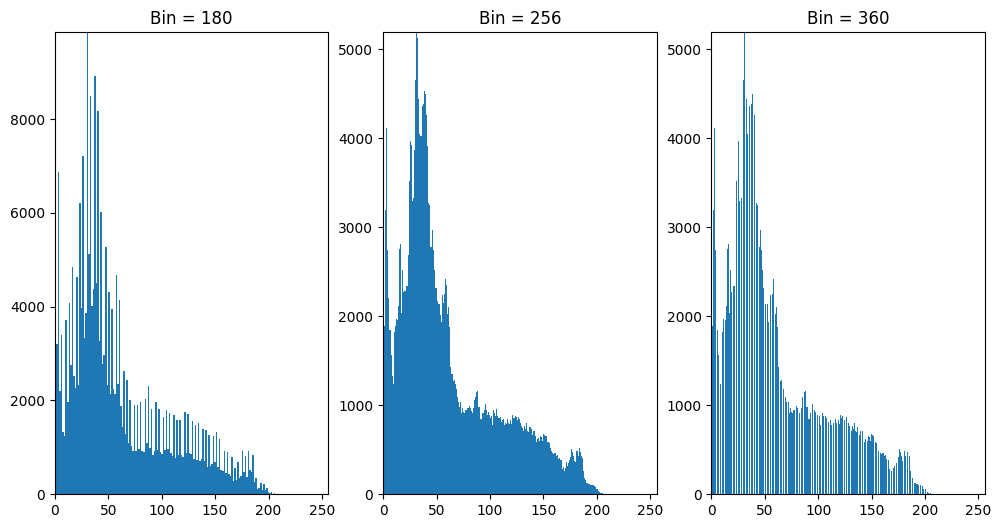

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.hist(img_gray.ravel(), 180, [0, 256])
ax2.hist(img_gray.ravel(), 256, [0, 256])
ax3.hist(img_gray.ravel(), 360, [0, 256])
ax1.set_title("Bin = 180")
ax2.set_title("Bin = 256")
ax3.set_title("Bin = 360")
ax1.margins(0)
ax2.margins(0)
ax3.margins(0)
plt.show()

## 2. Histogram Equalisation

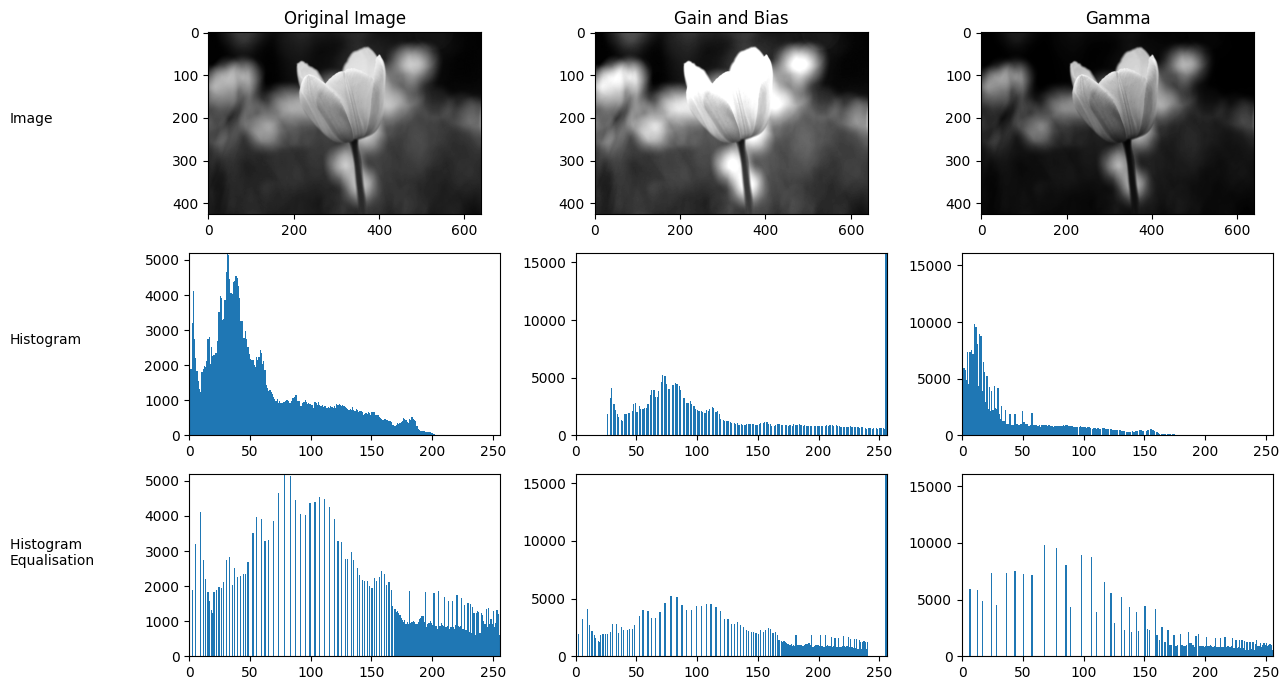

In [11]:
# Histogram Equalization
equalized = cv2.equalizeHist(img_gray)

# Gains and bias
img_float = img_gray.astype(float)
gain_bias = (img_float * 1.5) + 25      # linear transformation
gain_bias[gain_bias > 255] = 255
gain_bias = gain_bias.astype("uint8")
eq_gainBias = cv2.equalizeHist(gain_bias)

# Gamma
gamma = ((img_gray / 255) ** 1.5) * 255
gamma[gamma > 255] = 255
gamma = gamma.astype("uint8")
eq_gamma = cv2.equalizeHist(gamma)

# Display the images
fig, axs = plt.subplots(3, 4, figsize=(13,7), gridspec_kw={'width_ratios': [1, 3, 3, 3]})
axs[0,0].set_axis_off()
axs[0,0].text(0, 0.5, "Image")
axs[1,0].set_axis_off()
axs[1,0].text(0, 0.5, "Histogram")
axs[2,0].set_axis_off()
axs[2,0].text(0, 0.5, "Histogram \nEqualisation")

axs[0,1].imshow(img_gray, cmap="gray")
axs[0,1].set_title("Original Image")
axs[0,2].imshow(gain_bias, cmap="gray")
axs[0,2].set_title("Gain and Bias")
axs[0,3].imshow(gamma, cmap="gray")
axs[0,3].set_title("Gamma")

axs[1,1].hist(img_gray.ravel(),256,[0, 256])
axs[1,1].margins(0)
axs[1,2].hist(gain_bias.ravel(),256,[0, 256])
axs[1,2].margins(0)
axs[1,3].hist(gamma.ravel(),256,[0, 256])
axs[1,3].margins(0)

axs[2,1].hist(equalized.ravel(),256,[0,256])
axs[2,1].margins(0)
axs[2,2].hist(eq_gainBias.ravel(),256,[0,256])
axs[2,2].margins(0)
axs[2,3].hist(eq_gamma.ravel(),256,[0,256])
axs[2,3].margins(0)

plt.tight_layout()
plt.show()

## 3. Contrast Stretching

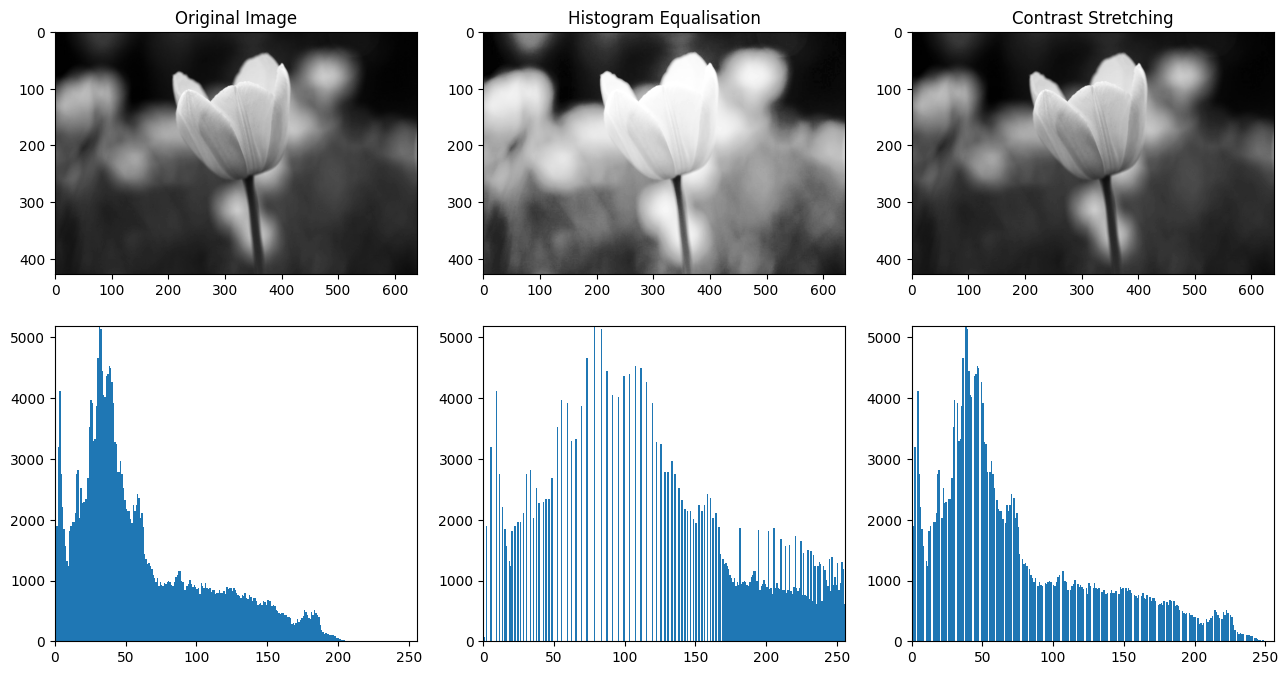

In [12]:
contrast_stretch = cv2.normalize(img_gray, None, 0, 255, norm_type=cv2.NORM_MINMAX)

# Display the original, after histogram equalisation and after contrast stretching
fig, axs = plt.subplots(2, 3, figsize=(13,7))
axs[0,0].imshow(img_gray, cmap="gray")
axs[0,0].set_title("Original Image")
axs[0,1].imshow(equalized, cmap="gray")
axs[0,1].set_title("Histogram Equalisation")
axs[0,2].imshow(contrast_stretch, cmap="gray")
axs[0,2].set_title("Contrast Stretching")
axs[1,0].hist(img_gray.ravel(),256,[0, 256])
axs[1,0].margins(0)
axs[1,1].hist(equalized.ravel(),256,[0, 256])
axs[1,1].margins(0)
axs[1,2].hist(contrast_stretch.ravel(),256,[0, 256])
axs[1,2].margins(0)
plt.tight_layout()
plt.show()